In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Import model selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_validate

# CNN frameworks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU

#Import measurement metrics
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
train_df= pd.read_csv(r'C:\Users\Legion Y530\Desktop\digit-recognizer\train.csv')
test_df= pd.read_csv(r'C:\Users\Legion Y530\Desktop\digit-recognizer\test.csv')

# Data understanding

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Check the value of the label for the record on row 40059 column 0
train_df.iloc[40059,0]

4

In [10]:
# Take a random sample of 5 records
train_df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40059,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15177,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39306,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37449,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# converting the training dataframe to numpy array to so that since each row of the dataframe represents a character
# the row will be an array of dim 28x28 and it will be stored in to an array of arrays
train_df.iloc[4,1:].to_numpy().reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  25, 130, 155,
        254, 254, 254, 157,  30,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8, 103, 253, 253, 253,
        253, 253, 253, 253, 253, 114,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

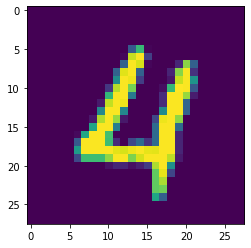

In [24]:
# Lets see which character is on line 40059 by taking the row from the dataframe and reshaping it into 28x28 dim
plt.imshow(train_df.iloc[40059,1:].to_numpy().reshape(28,28)) 

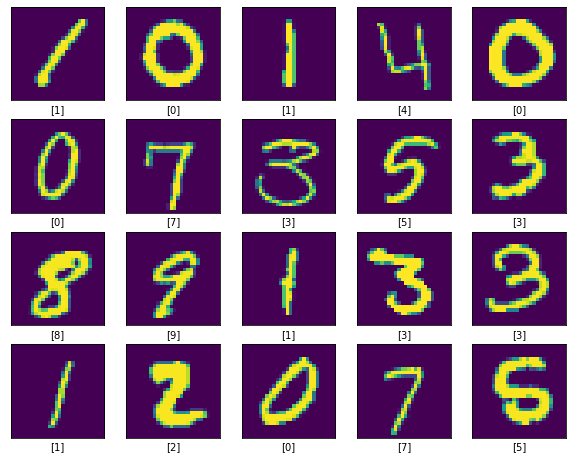

In [25]:
# digit visualization
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1) # creating subplot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_df.iloc[i,1:].to_numpy().reshape(28,28))
    plt.xlabel([train_df.iloc[i,0]])
plt.show()

# Data splitting

In [27]:
X= train_df.drop(['label'], axis=1)
y= train_df['label']

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=0)

In [46]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X_train= X_train/255
X_val= X_val/255

In [48]:
X_train.shape

(33600, 784)

In [49]:
X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_train.shape

(33600, 28, 28, 1)

In [50]:
X_val = X_val.to_numpy().reshape(-1,28,28,1)
X_val.shape

(8400, 28, 28, 1)

# Creating the CNN model

In [53]:
model = keras.Sequential([
    #cnn
    layers.Conv2D(56, (3,3), padding='same',activation='relu', input_shape=(28,28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(28, (3,3),padding='same', activation='relu', input_shape=(28,128, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(14, (3,3),padding='same', activation='relu', input_shape=(28,128, 1)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 56)        560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 56)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 28)        14140     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 28)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 14)          3542      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 14)          0         
____

In [54]:
# Let's compile the model
model.compile(
     optimizer='adam',
     loss='sparse_categorical_crossentropy',
     metrics=["accuracy"]
)
history= model.fit(X_train, y_train, epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
33600/33600 [==============================] - 93s 3ms/sample - loss: 0.3225 - acc: 0.8913
Epoch 2/50
33600/33600 [==============================] - 79s 2ms/sample - loss: 0.0830 - acc: 0.9749
Epoch 3/50
33600/33600 [==============================] - 80s 2ms/sample - loss: 0.0631 - acc: 0.9808
Epoch 4/50
33600/33600 [==============================] - 80s 2ms/sample - loss: 0.0485 - acc: 0.9856
Epoch 5/50
33600/33600 [==============================] - 77s 2ms/sample - loss: 0.0424 - acc: 0.9870
Epoch 6/50
33600/33600 [==============================] - 79s 2ms/sample - loss: 0.0386 - acc: 0.9881
Epoch 7/50
33600/33600 [==============================] - 31s 929us/sample - loss: 0.0334 - acc: 0.9898 - loss: 0.0335
Epoch 8/50
33600/33600 [==============================] - 22s 649us/sample - loss: 0.0270 - acc: 0.9915
Epoch 9/50
33600/33600 [==============================] - 21s 639us/sam

In [55]:
# Prediction and Evaluation
model.evaluate(X_val,y_val)

8400/8400 [==============================] - 2s 240us/sample - loss: 0.0738 - acc: 0.9883s - loss


[0.07382992671990256, 0.98833334]

In [56]:
pred= model.predict(X_val)

In [57]:
pred= np.argmax(pred, axis=1)
pred[:10]

array([3, 6, 9, 5, 6, 5, 6, 0, 0, 1], dtype=int64)

# Classification report & Confusion Matrix

In [62]:
print(classification_report(y_val, pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       813
          1       0.99      0.99      0.99       961
          2       0.98      0.99      0.99       860
          3       1.00      0.98      0.99       863
          4       0.99      0.99      0.99       827
          5       0.99      0.99      0.99       756
          6       0.99      1.00      0.99       841
          7       0.99      0.99      0.99       899
          8       0.98      0.99      0.98       768
          9       0.99      0.97      0.98       812

avg / total       0.99      0.99      0.99      8400



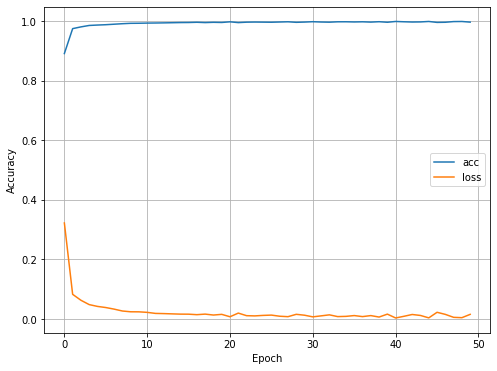

In [66]:
plt.figure(figsize=(8,6))
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid('on')  

# On the test dataset

In [67]:
# Reshape the dataset into an array of arrays with dim 28x28 
test_df=test_df.to_numpy().reshape(-1,28,28,1)

In [68]:
# Predict the y value for each record
X_test= test_df
y_pred= model.predict(X_test)

In [69]:
# See the last 10 predicted values
y_pred= np.argmax(y_pred, axis=1)
y_pred[:10]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3], dtype=int64)

In [71]:
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [72]:
# The prediction on the test dataset is stored in the variable y_pred